Association Rules

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('book.csv')

In [3]:
new_df=df[:]
new_df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
col_name=new_df.columns
for j in range(new_df.shape[0]):
    my_array=np.array(new_df.loc[j])
    i=0
    for x in my_array:
        if x==1:
            new_df.loc[j,col_name[i]]=col_name[i]
        i=i+1

In [5]:
new_df.replace(to_replace=0,value='NA',inplace=True)
new_df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,NA,YouthBks,NA,DoItYBks,NA,NA,GeogBks,NA,NA,NA,NA
1,ChildBks,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,ChildBks,YouthBks,CookBks,NA,RefBks,NA,GeogBks,NA,NA,NA,NA
4,NA,NA,CookBks,NA,NA,NA,GeogBks,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...
1995,NA,NA,CookBks,NA,NA,ArtBks,GeogBks,ItalCook,NA,ItalArt,Florence
1996,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1997,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1998,NA,NA,CookBks,NA,NA,NA,NA,NA,NA,NA,NA


In [6]:
index=new_df.iterrows()

In [7]:
Row_list =[]
for index, rows in new_df.iterrows():
    my_list =[rows.ChildBks,rows.YouthBks,rows.DoItYBks,rows.RefBks,rows.ArtBks,rows.GeogBks,rows.ItalAtlas,rows.ItalArt,rows.Florence]
    Row_list.append(my_list)

In [8]:
Row_list

[['NA', 'YouthBks', 'DoItYBks', 'NA', 'NA', 'GeogBks', 'NA', 'NA', 'NA'],
 ['ChildBks', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA'],
 ['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA'],
 ['ChildBks', 'YouthBks', 'NA', 'RefBks', 'NA', 'GeogBks', 'NA', 'NA', 'NA'],
 ['NA', 'NA', 'NA', 'NA', 'NA', 'GeogBks', 'NA', 'NA', 'NA'],
 ['ChildBks', 'NA', 'NA', 'NA', 'ArtBks', 'NA', 'NA', 'NA', 'Florence'],
 ['NA', 'YouthBks', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA'],
 ['NA', 'YouthBks', 'NA', 'RefBks', 'NA', 'NA', 'NA', 'NA', 'NA'],
 ['ChildBks', 'NA', 'DoItYBks', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA'],
 ['ChildBks', 'YouthBks', 'NA', 'NA', 'NA', 'GeogBks', 'NA', 'NA', 'NA'],
 ['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA'],
 ['NA', 'NA', 'NA', 'NA', 'NA', 'GeogBks', 'NA', 'NA', 'NA'],
 ['ChildBks', 'NA', 'NA', 'NA', 'ArtBks', 'NA', 'NA', 'NA', 'Florence'],
 ['ChildBks',
  'YouthBks',
  'DoItYBks',
  'RefBks',
  'ArtBks',
  'NA',
  'ItalAtlas',
  'ItalArt',
  'NA'],
 ['ChildBks', 'Yo

In [9]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [10]:
te = TransactionEncoder()
te_ary = te.fit(Row_list).transform(Row_list)
df1 = pd.DataFrame(te_ary, columns=te.columns_)
df1.drop('NA',axis=1,inplace=True)
df1

,ArtBks,ChildBks,DoItYBks,Florence,GeogBks,ItalArt,ItalAtlas,RefBks,YouthBks
0,False,False,True,False,True,False,False,False,True
1,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,True,False,False,True,False,False,True,True
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1995,True,False,False,True,True,True,False,False,False
1996,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False


## 1. Association rules with 10% Support and 70% confidence

In [11]:
frequent_itemsets = apriori(df1, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [12]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
1,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
2,(ArtBks),(DoItYBks),0.2410,0.2820,0.1235,0.512448,1.817192,0.055538,1.472664
3,(DoItYBks),(ArtBks),0.2820,0.2410,0.1235,0.437943,1.817192,0.055538,1.350397
4,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304
5,(GeogBks),(ArtBks),0.2760,0.2410,0.1275,0.461957,1.916832,0.060984,1.410667
6,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375
7,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270
8,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
9,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770


In [13]:
mylift_1_8=rules[rules.lift>1.0]
mylift_1_8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
1,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
2,(ArtBks),(DoItYBks),0.2410,0.2820,0.1235,0.512448,1.817192,0.055538,1.472664
3,(DoItYBks),(ArtBks),0.2820,0.2410,0.1235,0.437943,1.817192,0.055538,1.350397
4,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304
5,(GeogBks),(ArtBks),0.2760,0.2410,0.1275,0.461957,1.916832,0.060984,1.410667
6,(ArtBks),(YouthBks),0.2410,0.2475,0.1010,0.419087,1.693281,0.041353,1.295375
7,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270
8,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
9,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770


In [14]:
from pyvis.network import Network
net2=Network(directed=True)
for i in zip(mylift_1_8.antecedents,mylift_1_8.consequents):
    for j in i:
        net2.add_node(str(j))
for i,j in zip(mylift_1_8.antecedents,mylift_1_8.consequents):
    net2.add_edge(str(i),str(j))
net2.show('nodes3.html')

G:\ExcelR\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
G:\ExcelR\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


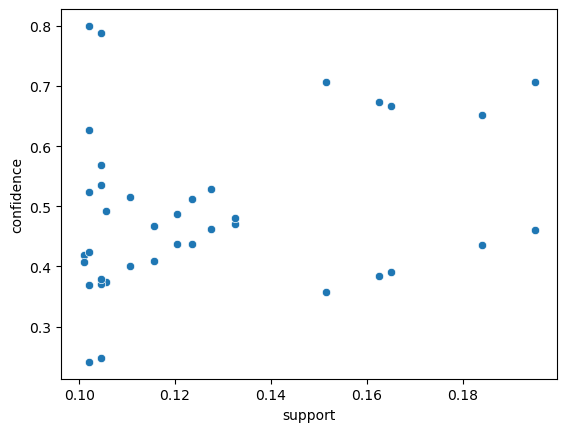

In [15]:
import seaborn as sns
sns.scatterplot('support', 'confidence', data=rules,legend='brief')
plt.show()

## 2. Association rules with 5% Support and 80% confidence

In [16]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.to_clipboard()
frequent_itemsets

G:\ExcelR\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
95,0.0600,"(CookBks, YouthBks, DoItYBks, GeogBks)",4
96,0.0560,"(CookBks, YouthBks, ArtBks, GeogBks)",4
97,0.0650,"(CookBks, ArtBks, DoItYBks, GeogBks)",4
98,0.0510,"(DoItYBks, CookBks, ChildBks, GeogBks, YouthBks)",5


In [17]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
...,...,...,...,...,...,...,...,...,...
57,"(ArtBks, DoItYBks, GeogBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125
58,"(CookBks, YouthBks, DoItYBks, GeogBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
59,"(YouthBks, DoItYBks, ChildBks, GeogBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
60,"(CookBks, ArtBks, DoItYBks, GeogBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


In [18]:
mylift_1_8=rules[rules.lift>1.0]
mylift_1_8.to_clipboard()
mylift_1_8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
...,...,...,...,...,...,...,...,...,...
57,"(ArtBks, DoItYBks, GeogBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125
58,"(CookBks, YouthBks, DoItYBks, GeogBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
59,"(YouthBks, DoItYBks, ChildBks, GeogBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
60,"(CookBks, ArtBks, DoItYBks, GeogBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


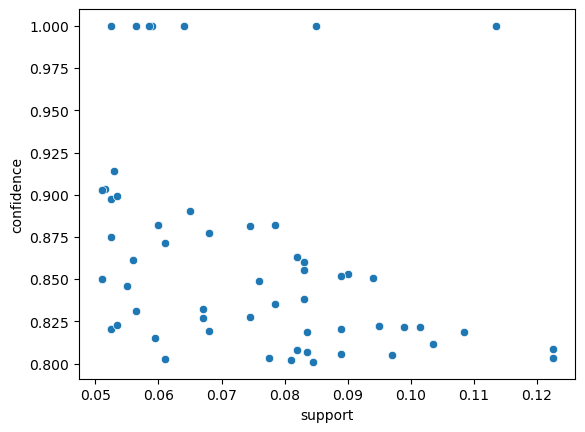

In [19]:
import seaborn as sns
sns.scatterplot('support', 'confidence', data=rules,legend='brief')
plt.show()

In [20]:
weight_list=[]
for k in mylift_1_8.confidence.values.tolist():
    weight_list.append(k)
weight_list

[1.0,
 0.8225108225108225,
 0.8601036269430052,
 0.8215767634854773,
 0.8032786885245902,
 0.8085808580858086,
 1.0,
 0.8530805687203792,
 0.8491620111731844,
 0.8506787330316742,
 0.8203125,
 0.8225108225108225,
 0.8031088082901554,
 0.8019801980198019,
 0.8049792531120332,
 1.0,
 0.8009478672985783,
 0.8218623481781377,
 0.8188679245283018,
 1.0,
 0.8054298642533936,
 0.8117647058823528,
 1.0,
 1.0,
 0.8631578947368421,
 0.8631578947368421,
 0.8774193548387097,
 0.8192771084337349,
 0.8271604938271605,
 0.8322981366459627,
 0.8556701030927836,
 0.8383838383838383,
 0.9137931034482758,
 0.85,
 0.8308823529411764,
 0.9035087719298245,
 0.8461538461538461,
 0.8816568047337278,
 0.8277777777777777,
 0.8078817733990148,
 0.8631578947368421,
 0.8202764976958525,
 0.8516746411483254,
 0.8714285714285713,
 0.8026315789473685,
 0.8820224719101124,
 0.8351063829787234,
 0.8067632850241547,
 0.8186274509803922,
 0.8203125,
 1.0,
 0.8203125,
 0.8974358974358974,
 0.815068493150685,
 0.875,
 0.88

In [21]:
net3=Network(directed=True)
l=0
for i in zip(mylift_1_8.antecedents,mylift_1_8.consequents):
    for j in i:
        net3.add_node(str(j))
for i,j in zip(mylift_1_8.antecedents,mylift_1_8.consequents):
    net3.add_edge(str(i),str(j),width=weight_list[l])
    l=l+1
net3.show('nodes4.html')

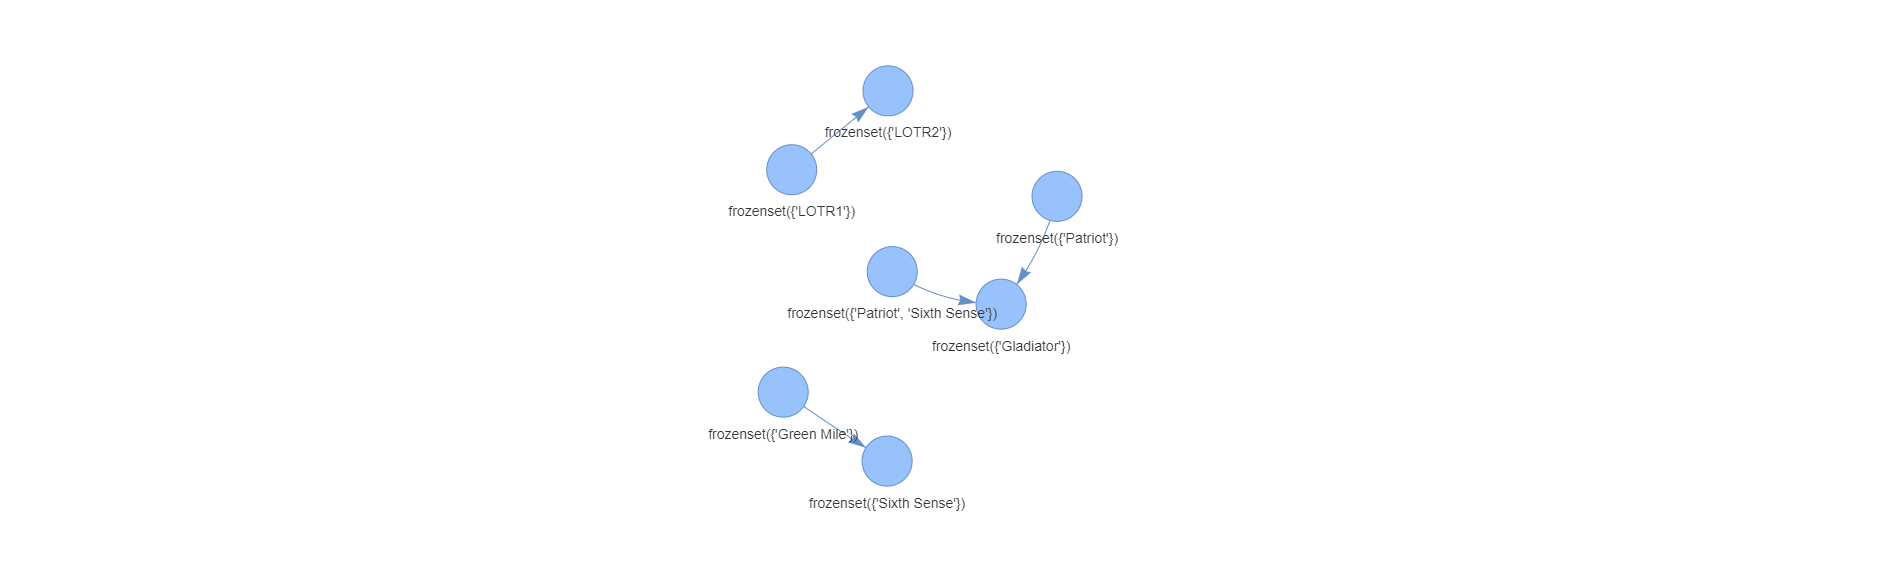